**<h1>Проект e-commerce</h1>**

<h2>Проанализировать совершенные покупки и ответить на следующие вопросы:</h2>

[1. Загрузка данных](#1)<br>
[2. Исследовательский анализ данных](#2)<br>
[3. Сформулируем, что должно считаться покупкой. (Обосновать выбор можно с помощью фактов оплат, статусов заказов и других имеющихся данных)](#3)<br>
[4. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)](#4)<br> 
[5. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)](#5)<br>
[6. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)](#6)<br>
[7. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)](#7)<br> 
[8. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)](#8)<br>
[9. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)](#9)<br>

customers_df
customer_id — позаказный идентификатор пользователя

order_df

customer_id —  позаказный идентификатор пользователя
order_id - уникальный идентификатор заказа (номер чека)
order_status —  статус заказа
order_delivered_customer_date —  время доставки заказа
order_approved_at** —  время подтверждения оплаты заказа
order_delivered_customer_date** —  время доставки заказа

order_items_df
order_id —  уникальный идентификатор заказа (номер чека)



**<h2>Файлы:</h2>**

<h2>olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей</h2>


**customer_id** — позаказный идентификатор пользователя

**customer_unique_id** —  уникальный идентификатор пользователя  (аналог номера паспорта)

**customer_zip_code_prefix** —  почтовый индекс пользователя

**customer_city** —  город доставки пользователя

**customer_state** —  штат доставки пользователя


<h2>olist_orders_dataset.csv —  таблица заказов</h2>


**order_id** —  уникальный идентификатор заказа (номер чека)

**customer_id** —  позаказный идентификатор пользователя

**order_status** —  статус заказа

**order_purchase_timestamp** —  время создания заказа

**order_approved_at** —  время подтверждения оплаты заказа

**order_delivered_carrier_date** —  время передачи заказа в логистическую службу

**order_delivered_customer_date** —  время доставки заказа

**order_estimated_delivery_date** —  обещанная дата доставки


<h2>olist_order_items_dataset.csv —  товарные позиции, входящие в заказы</h2>


**order_id** —  уникальный идентификатор заказа (номер чека)

**order_item_id** —  идентификатор товара внутри одного заказа

**product_id** —  ид товара (аналог штрихкода)

**seller_id** — ид производителя товара

**shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

**price** —  цена за единицу товара

**freight_value** —  вес товара

— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

<h2>Уникальные статусы заказов в таблице olist_order_items_dataset:</h2>

**created** —  создан

**approved** —  подтверждён

**invoiced** —  выставлен счёт

**processing** —  в процессе сборки заказа

**shipped** —  отгружен со склада

**delivered** —  доставлен пользователю 

**unavailable** —  недоступен

**canceled** —  отменён

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

<a id='1'></a><h2>1. Загрузка данных</h2>

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

<a id='2'></a><h2>2. Исследоватеьский анализ данных</h2>

In [3]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.customer_unique_id.nunique()

96096

In [6]:
customers.duplicated().sum()

0

In [7]:
orders_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
orders_items.duplicated().sum()

0

In [10]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders.duplicated().sum()

0

**Вывод:** есть проблемы с типами данных: order_item_id в order_items_df, 

Измним типы данных на правильные

In [13]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders_items['shipping_limit_date'] = pd.to_datetime(orders_items.shipping_limit_date)

In [14]:
#order_df.info()
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [15]:
#order_df.head()
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<a id='3'></a><h2>3. Сформулируем, что должно считаться покупкой.</h2>

In [16]:
#Статус заказа
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

**Поскольку заказ может быть отменен на любом этапе покупки в плоть до возврата товара после получения, то покупками будут считать заказы со статусом доставленные(96478), . (Можно было бы включить заказы со статусом в процессе сборки 301 и отгруженые 1107,  поскольку доля возвратов незначительна))**

<a id='4'></a><h2>4. Сколько у нас пользователей, которые совершили покупку только один раз?</h2>

In [17]:
#добавим данные о пользователях в таблицу orders
purchases =  orders.merge(customers, on='customer_id')
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [18]:
#сколько покупателей заказывали только один раз
purchases[purchases['order_status'] == 'delivered']\
.groupby('customer_unique_id')\
.agg({'order_id': 'count'})\
.query('order_id == 1').sum()


order_id    90557
dtype: int64

<h2>Вывод:</h2>
Только одну покупку совершили 90557 покупателей то есть больше 90% покупателей не возвращаются.

<a id='5'></a><h2>5. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?</h2>

Доставка - передача в логистику (order_delivered_carrier_date), дата доставки (order_delivered_customer_date), статус заказа

canceled, unavailabl - недоставлены если нет даты доставки


 


Cоздадим колонку месяц<br>
Cделаем сводную таблицу из таблицы orders по статусам заказов.<br>
Столбцы - статус, значения - количество недоставленных товаров в месяц (дата доставки отсутствует посчитано количество за месяц).<br>
Группировка по месяцам<br>

In [19]:
#delivered = delivered[delivered.order_status == 'canceled']
#delivered

In [20]:
notdelivered = orders[orders.order_delivered_customer_date.isnull()]
notdelivered.order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [21]:
#orders[(orders.order_status == "delivered") & (orders.order_delivered_carrier_date.isna())]
# два доставленных заказа не прописались в логи с логистикой

In [22]:
#notdelivered = orders[(orders.order_delivered_carrier_date.notnull()) & (orders.order_delivered_customer_date.isnull())]
                    
notdelivered = notdelivered[['order_id','order_status','customer_id','order_purchase_timestamp', 'order_delivered_carrier_date']]
notdelivered['month_year'] = notdelivered['order_purchase_timestamp'].dt.strftime('%Y-%m')
notdelivered_month = notdelivered.groupby(['month_year','order_status'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id':'notdelivered'})
notdelivered_month = notdelivered_month.pivot(columns='order_status',index='month_year',values='notdelivered')
notdelivered_month

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
month_year,,,,,,,,
2016-09,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
2016-10,NaN,19.0,NaN,NaN,18.0,2.0,8.0,7.0
2017-01,NaN,3.0,NaN,NaN,12.0,9.0,16.0,10.0
2017-02,1.0,17.0,NaN,NaN,11.0,32.0,21.0,45.0
2017-03,NaN,33.0,NaN,NaN,3.0,23.0,45.0,32.0
2017-04,1.0,18.0,NaN,NaN,14.0,10.0,49.0,9.0
2017-05,NaN,29.0,NaN,1.0,16.0,23.0,55.0,31.0
2017-06,NaN,16.0,NaN,NaN,11.0,12.0,47.0,24.0
2017-07,NaN,28.0,NaN,NaN,7.0,11.0,56.0,52.0


In [23]:
notdelivered_month.describe().iloc[[1]].round()

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
mean,1.0,26.0,2.0,2.0,15.0,16.0,48.0,29.0


In [24]:
notdelivered_carrier = orders[(orders.order_delivered_carrier_date.notnull()) & (orders.order_delivered_customer_date.isnull())]
notdelivered_carrier

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


In [25]:
notdelivered_carrier['order_status'].unique()

array(['shipped', 'canceled', 'delivered'], dtype=object)

In [26]:
notdelivered_carrier = notdelivered_carrier[['order_id','order_status','customer_id','order_purchase_timestamp', 'order_delivered_carrier_date']]
notdelivered_carrier['month_year'] = notdelivered_carrier['order_purchase_timestamp'].dt.strftime('%Y-%m')
notdelivered_carrier = notdelivered_carrier.groupby(['month_year','order_status'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id':'notdelivered'})
notdelivered_carrier = notdelivered_carrier.pivot(columns='order_status',index='month_year',values='notdelivered')
notdelivered_carrier

C:\Users\firew\AppData\Local\Temp\ipykernel_21260\3191289491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notdelivered_carrier['month_year'] = notdelivered_carrier['order_purchase_timestamp'].dt.strftime('%Y-%m')


order_status,canceled,delivered,shipped
month_year,,,
2016-09,NaN,NaN,1.0
2016-10,NaN,NaN,8.0
2017-01,NaN,NaN,16.0
2017-02,NaN,NaN,21.0
2017-03,NaN,NaN,45.0
2017-04,NaN,NaN,49.0
2017-05,NaN,NaN,55.0
2017-06,NaN,NaN,47.0
2017-07,NaN,NaN,56.0


In [27]:
notdelivered_carrier.describe().iloc[[1]].round()

order_status,canceled,delivered,shipped
mean,17.0,2.0,48.0


In [28]:
#sns.set(
#    font_scale =2,
#    style      ="whitegrid",
#    rc         ={'figure.figsize':(20,7)}
   
#)
#ax = sns.barplot(x="month_year", y="notdelivered", data=month_notdelivered)
#plt.xticks(rotation=45)

<a id='6'></a><h2>6. По каждому товару определить, в какой день недели товар чаще всего покупается.</h2>

In [29]:
orders_item = pd.merge(purchases, orders_items, on='order_id', how='left') 
orders_item

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [30]:
orders_item.duplicated().sum()

0

In [31]:
orders_item_main = orders_item[['order_purchase_timestamp', 'product_id']]

In [32]:
orders_item_main['day'] = orders_item_main['order_purchase_timestamp'].dt.strftime('%A')
orders_item_main

C:\Users\firew\AppData\Local\Temp\ipykernel_21260\3178492635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_item_main['day'] = orders_item_main['order_purchase_timestamp'].dt.strftime('%A')


,order_purchase_timestamp,product_id,day
0,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,Monday
1,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,Wednesday
3,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday
...,...,...,...
113420,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,Tuesday
113421,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,Sunday
113422,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,Monday
113423,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,Monday


In [33]:
orders_by_days = orders_item_main.groupby(['day', 'product_id'], as_index=False) \
                                    .agg({'order_purchase_timestamp': 'count'}) \
                                    .rename(columns={'order_purchase_timestamp': 'amount'}) \
                                    .sort_values('amount', ascending=False)
orders_by_days.head(20)

,day,product_id,amount
54190,Wednesday,422879e10f46682990de24d770e7f83d,93
14535,Monday,99a4788cb24856965c36a24e339b6058,92
39349,Thursday,aca2eb7d00ea1a7b8ebd4e68314663af,89
5918,Friday,aca2eb7d00ea1a7b8ebd4e68314663af,87
48624,Tuesday,aca2eb7d00ea1a7b8ebd4e68314663af,85
35654,Thursday,422879e10f46682990de24d770e7f83d,79
15239,Monday,aca2eb7d00ea1a7b8ebd4e68314663af,78
2293,Friday,422879e10f46682990de24d770e7f83d,77
45392,Tuesday,53b36df67ebb7c41585e8d54d6772e08,76
5256,Friday,99a4788cb24856965c36a24e339b6058,75


In [34]:
orders_by_days.amount.describe()

count    61230.000000
mean         1.839784
std          2.916691
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         93.000000
Name: amount, dtype: float64

In [35]:
df = orders_by_days.groupby(['product_id'], as_index=True).agg({'day':'value_counts'}) \
    .rename(columns={'day':'quantity'}) \
    .sort_values('product_id') \
    .reset_index() \
    .pivot(index='product_id', columns='day', values='quantity') \
    .fillna(0)
df

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
fff81cc3158d2725c0655ab9ba0f712c,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fff9553ac224cec9d15d49f5a263411f,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='7'></a><h2>7. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть</h2>

In [36]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [37]:
#оставим нужные столбцы
purchases_1 = purchases[['order_id', 'order_purchase_timestamp', 'customer_unique_id']]

In [38]:
#число дней в каждом месяце
purchases_1['num_of_days'] = purchases_1['order_purchase_timestamp'].dt.days_in_month

C:\Users\firew\AppData\Local\Temp\ipykernel_21260\2914435747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_1['num_of_days'] = purchases_1['order_purchase_timestamp'].dt.days_in_month


In [39]:
purchases_1['num_of_weeks'] = round(purchases_1['num_of_days'] / 7, 2)
purchases_1['month_year'] = purchases_1['order_purchase_timestamp'].dt.strftime('%Y-%m')

C:\Users\firew\AppData\Local\Temp\ipykernel_21260\1179515961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_1['num_of_weeks'] = round(purchases_1['num_of_days'] / 7, 2)
C:\Users\firew\AppData\Local\Temp\ipykernel_21260\1179515961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_1['month_year'] = purchases_1['order_purchase_timestamp'].dt.strftime('%Y-%m')


In [40]:
purchases_1.head()

,order_id,order_purchase_timestamp,customer_unique_id,num_of_days,num_of_weeks,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,31,4.43,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,31,4.43,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,31,4.43,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,30,4.29,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,28,4.00,2018-02


In [41]:
purchases_2 = purchases_1.groupby(['month_year', 'customer_unique_id', 'num_of_weeks']) \
                .agg({'order_id':'count'}) \
                .reset_index()
purchases_2.head()

,month_year,customer_unique_id,num_of_weeks,order_id
0,2016-09,009b0127b727ab0ba422f6d9604487c7,4.29,1
1,2016-09,4854e9b3feff728c13ee5fc7d1547e92,4.29,1
2,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,4.29,1
3,2016-09,b7d76e111c89f7ebf14761390f0f7d17,4.29,1
4,2016-10,0032c76b20340da25249092a268ce66c,4.43,1


In [42]:
purchases_2['purch_per_week'] = round(purchases_2['order_id'] / purchases_2['num_of_weeks'], 2)

In [43]:
purchases_2.sort_values('purch_per_week', ascending=False)

,month_year,customer_unique_id,num_of_weeks,order_id,purch_per_week
391,2017-01,12f5d6e1cbf93dafd9dcc19095df0b3d,4.43,6,1.35
2176,2017-02,a239b8e2fbce33780f1f1912e2ee5275,4.00,4,1.00
56514,2018-02,b4e4f24de1e8725b74e4a1f4975116ed,4.00,4,1.00
53464,2018-02,3e43e6105506432c953e165fb2acf44c,4.00,4,1.00
25766,2017-09,b08fab27d47a1eb6deda07bfd965ad43,4.29,4,0.93
...,...,...,...,...,...
34145,2017-11,5510d1cb4dd50789f97bcb2a57bc8380,4.29,1,0.23
34144,2017-11,55106b6ebf9f870a3a359a00d5f26d1c,4.29,1,0.23
34143,2017-11,550fcb2851acb1782343f2258028f6a8,4.29,1,0.23
34142,2017-11,550bfaea5eb35c4f3184f7eaf35a9087,4.29,1,0.23


<a id='8'></a><h2>8. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.</h2>

In [44]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [45]:
df3 = purchases[['customer_id', 'customer_unique_id', 'order_purchase_timestamp', 'order_id', 'order_approved_at']]

df3 = purchases.query('order_purchase_timestamp >= "2017-01-01" & order_purchase_timestamp <= "2018-03-31"')
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS


In [46]:
df3['order_month'] = df3['order_approved_at'].dt.to_period('M')
df3['cohort'] = df3.groupby('customer_unique_id')['order_approved_at'] \
                                           .transform('min').dt.to_period('M')
df3.head()

C:\Users\firew\AppData\Local\Temp\ipykernel_21260\145828292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['order_month'] = df3['order_approved_at'].dt.to_period('M')
C:\Users\firew\AppData\Local\Temp\ipykernel_21260\145828292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cohort'] = df3.groupby('customer_unique_id')['order_approved_at'] \


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07,2017-07
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04,2017-04


In [47]:
# Сгруппируем данные по когорте и году-месяцу покупки заказа и посчитаем количество уникальных пользователей
from operator import attrgetter
cohort = df3.groupby(['cohort', 'order_month']) \
                        .agg({'customer_id': pd.Series.nunique}) \
                        .rename(columns={'customer_id': 'num_customers'}) \
                        .reset_index()

# Посчитаем сколько прошло месяцев между первой покупкой и датой покупки заказа
cohort['period_number'] = (cohort.order_month - cohort.cohort).apply(attrgetter('n'))
cohort.head()

,cohort,order_month,num_customers,period_number
0,2017-01,2017-01,760,0
1,2017-01,2017-02,4,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


In [48]:
# Трансформируем нашу таблицу так, чтобы в индексах были наши когорты, в столбцах — период после первой покупки,
# в значениях — количество уникальных пользователей, пришедших на данный период после первой покупки

cohort_pivot = cohort.pivot_table(index='cohort',
                                columns='period_number',
                                values='num_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,,
2017-01,760.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0,6.0,3.0,1.0
2017-02,1761.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,NaN
2017-03,2683.0,14.0,9.0,11.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,NaN,NaN
2017-04,2354.0,15.0,6.0,5.0,7.0,6.0,9.0,6.0,8.0,4.0,5.0,2.0,NaN,NaN,NaN
2017-05,3663.0,20.0,21.0,14.0,11.0,15.0,17.0,6.0,9.0,13.0,10.0,NaN,NaN,NaN,NaN
2017-06,3207.0,15.0,12.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN
2017-07,3918.0,22.0,13.0,8.0,15.0,7.0,12.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4284.0,28.0,17.0,11.0,16.0,24.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4222.0,27.0,20.0,18.0,18.0,15.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cohort_size = cohort_pivot.iloc[:,0]

In [50]:
#Поделим значения ячейки на соответствующие им значения и получим таблицу retention

retention_matrix = cohort_pivot.divide(cohort_size, axis = 0).mul(100).round(2)

In [51]:
# Заполним ненужные значения NaN нулем

retention_matrix.iloc[0] = retention_matrix.iloc[0].fillna(0)
retention_matrix.iloc[1] = retention_matrix.iloc[1].fillna(0)
retention_matrix.iloc[2] = retention_matrix.iloc[2].fillna(0)
retention_matrix.iloc[3, 9] = 0

In [52]:
# Укажем максимальное значение в каждом столбце
retention_matrix.style.highlight_max()

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,,
2017-01,100.000000,0.530000,0.260000,0.130000,0.390000,0.130000,0.530000,0.130000,0.130000,0.000000,0.260000,0.260000,0.790000,0.390000,0.130000
2017-02,100.000000,0.230000,0.230000,0.170000,0.400000,0.110000,0.230000,0.170000,0.110000,0.230000,0.110000,0.280000,0.170000,0.170000,0.000000
2017-03,100.000000,0.520000,0.340000,0.410000,0.340000,0.150000,0.150000,0.300000,0.300000,0.110000,0.370000,0.150000,0.220000,0.000000,0.000000
2017-04,100.000000,0.640000,0.250000,0.210000,0.300000,0.250000,0.380000,0.250000,0.340000,0.000000,0.210000,0.080000,nan,nan,nan
2017-05,100.000000,0.550000,0.570000,0.380000,0.300000,0.410000,0.460000,0.160000,0.250000,0.350000,0.270000,nan,nan,nan,nan
2017-06,100.000000,0.470000,0.370000,0.410000,0.250000,0.340000,0.370000,0.220000,0.120000,0.220000,nan,nan,nan,nan,nan
2017-07,100.000000,0.560000,0.330000,0.200000,0.380000,0.180000,0.310000,0.100000,0.200000,nan,nan,nan,nan,nan,nan
2017-08,100.000000,0.650000,0.400000,0.260000,0.370000,0.560000,0.260000,0.230000,nan,nan,nan,nan,nan,nan,nan
2017-09,100.000000,0.640000,0.470000,0.430000,0.430000,0.360000,0.210000,nan,nan,nan,nan,nan,nan,nan,nan


<a id='9'></a><h2>9. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.</h2>

In [53]:
purchases['month_year_order'] = purchases['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [54]:
purchases.groupby('month_year_order', as_index=False) \
                    .agg({'order_id': 'count'}) # подойдет период с августа 2017 до августа 2018

,month_year_order,order_id
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [55]:
purchases[['order_id', 'customer_unique_id', 'month_year_order', 'order_purchase_timestamp']] \
.query('order_purchase_timestamp >= "2017-08-01" & order_purchase_timestamp <= "2018-08-01"')

,order_id,customer_unique_id,month_year_order,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07,2018-07-24 20:41:37
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02-13 21:18:39
12,82566a660a982b15fb86e904c8d32918,e97109680b052ee858d93a539597bba7,2018-06,2018-06-07 10:06:19
...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,c716cf2b5b86fb24257cffe9e7969df8,2017-10,2017-10-04 19:57:37
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,2017-08,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01-08 21:28:27


In [56]:
purchases.groupby('month_year_order', as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .iloc[10:22].order_id.sum() # все сошлось

73943

In [57]:
df6 = purchases[['order_id', 'customer_unique_id', 'month_year_order', 'order_purchase_timestamp']] \
        .query('order_purchase_timestamp >= "2017-08-01" & order_purchase_timestamp <= "2018-08-01"')

In [58]:
# соединим две таблицы
pd.merge(orders_items, df6, on="order_id")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,month_year_order,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31
2,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,635d9ac1680f03288e72ada3a1035803,2017-12,2017-12-10 11:53:48
3,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,2018-07,2018-07-04 12:08:27
4,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,639d23421f5517f69d0c3d6e6564cf0e,2018-03,2018-03-19 18:40:33
...,...,...,...,...,...,...,...,...,...,...
84198,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64,2018-04,2018-04-23 13:57:06
84199,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,0da9fe112eae0c74d3ba1fe16de0988b,2018-07,2018-07-14 10:26:46
84200,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,cd79b407828f02fdbba457111c38e4c4,2017-10,2017-10-23 17:07:56
84201,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,2017-08,2017-08-14 23:02:59


In [59]:
order_list = df6.order_id.tolist()
orders_items.query('order_id in @order_list').shape # проверим,что все прошло нормально

(84203, 7)

Для RFM анализа нужно:

    дата с последней покупки - recency
    число покупок по каждому покупателю за год - frequency
    сумма, которую потратил каждый пользователь за это время - monetary

In [60]:
# выкинем все ненужное
merged_df6 = pd.merge(orders_items, df6, on="order_id")[['order_id', \
                                                  'product_id', 'price', 'customer_unique_id', 'order_purchase_timestamp']]

In [61]:
merged_df6.head()

,order_id,product_id,price,customer_unique_id,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02
1,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31
2,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,635d9ac1680f03288e72ada3a1035803,2017-12-10 11:53:48
3,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,810.00,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27
4,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,145.95,639d23421f5517f69d0c3d6e6564cf0e,2018-03-19 18:40:33


In [62]:
# добавим "нынешнюю" дату и найдем дельту в днях от нее
now = np.datetime64('2018-08-03')
now

numpy.datetime64('2018-08-03')

In [63]:
merged_df6['time_format'] = merged_df6['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
merged_df6['time_format'] = pd.to_datetime(merged_df6['time_format'], format='%Y-%m-%d')

In [64]:
merged_df6['now'] = now

In [65]:
merged_df6['delta_time'] = merged_df6['now'] - merged_df6['time_format']

In [66]:
merged_df6.head()

,order_id,product_id,price,customer_unique_id,order_purchase_timestamp,time_format,now,delta_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,2017-09-13,2018-08-03,324 days
1,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,2018-01-14,2018-08-03,201 days
2,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,635d9ac1680f03288e72ada3a1035803,2017-12-10 11:53:48,2017-12-10,2018-08-03,236 days
3,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,810.00,fda4476abb6307ab3c415b7e6d026526,2018-07-04 12:08:27,2018-07-04,2018-08-03,30 days
4,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,145.95,639d23421f5517f69d0c3d6e6564cf0e,2018-03-19 18:40:33,2018-03-19,2018-08-03,137 days


In [67]:
merged_df6 = merged_df6.drop(columns=['order_purchase_timestamp', 'now']) \
                        .rename(columns={'time_format': 'purchase_date'})

In [68]:
# Далее нужно сгруппировать пользователей и найти минимальную дельту кажого пользователя. 
# Заодно найдем сумму каждого и число покупок
final = merged_df6.groupby('customer_unique_id', as_index=False) \
                            .agg({'delta_time': 'min', 'price': 'sum', 'product_id': 'count'})
final

,customer_unique_id,delta_time,price,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,85 days,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,88 days,18.90,1
2,0000f6ccb0745a6a4b88665a16c9f078,295 days,25.99,1
3,0004aac84e0df4da2b147fca70cf8255,262 days,180.00,1
4,0004bd2a26a76fe21f786e4fbd80607f,120 days,154.00,1
...,...,...,...,...
71423,fffb09418989a0dbff854a28163e47c6,229 days,58.00,1
71424,fffbf87b7a1a6fa8b03f081c5f51a201,219 days,149.00,1
71425,fffcc512b7dfecaffd80f13614af1d16,114 days,688.00,1
71426,fffea47cd6d3cc0a88bd621562a9d061,236 days,64.89,1


In [69]:
final['int_delta_days'] = final['delta_time'].dt.days # переведем дни в числа

In [70]:
final[['int_delta_days', 'price', 'product_id']].describe()

,int_delta_days,price,product_id
count,71428.000000,71428.000000,71428.000000
mean,171.953226,142.073106,1.178851
std,98.924970,212.392040,0.620470
min,3.000000,0.850000,1.000000
25%,90.000000,48.000000,1.000000
50%,167.000000,89.900000,1.000000
75%,251.000000,154.910000,1.000000
max,367.000000,13440.000000,20.000000


<AxesSubplot:>

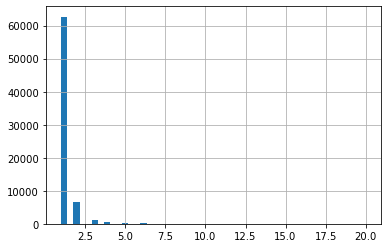

In [71]:
# посмотрим на распределения
final.product_id.hist(bins=50) # типичная картина - похоже на логнормальное распределение

<AxesSubplot:>

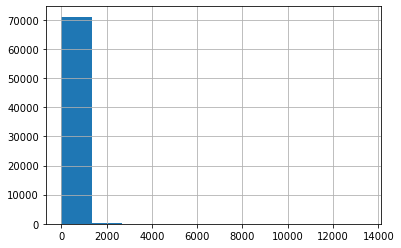

In [72]:
final.price.hist() # вполне ожидаемо - подавляющее большиснвто тех, кто тратит мало

<AxesSubplot:>

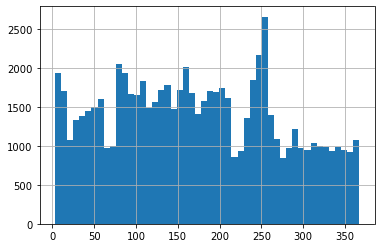

In [73]:
final.int_delta_days.hist(bins=50) # напоминает равномерное распределение, можно рассмотреть сезонность продаж

In [74]:
final[['int_delta_days', 'price', 'product_id']].query('product_id > 1').describe() 
# не более 15% совершили более 1 покупки
# около 5к человек сделали не более 2х покупок

,int_delta_days,price,product_id
count,8732.000000,8732.000000,8732.000000
mean,169.371851,220.169494,2.463010
std,98.437564,310.385038,1.127181
min,3.000000,7.800000,2.000000
25%,87.000000,87.800000,2.000000
50%,163.000000,144.900000,2.000000
75%,251.000000,249.892500,2.000000
max,367.000000,13440.000000,20.000000


In [75]:
final[['int_delta_days', 'price', 'product_id']].query('product_id > 3').describe() 

,int_delta_days,price,product_id
count,888.000000,888.000000,888.000000
mean,164.634009,419.046475,5.123874
std,98.462006,651.375612,1.848359
min,3.000000,17.500000,4.000000
25%,83.000000,149.500000,4.000000
50%,156.000000,273.950000,4.000000
75%,250.250000,489.205000,6.000000
max,367.000000,13440.000000,20.000000
